#### This will install the palmerpenguins dataset ####

In [20]:
!pip install palmerpenguins


In [21]:
#### Import necessary libraries ####

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

#### Load the penguines dataset ####
penguins = load_penguins()

#### Set theme ####
sns.set_theme(style="whitegrid")



#### Identify and display the unique values in each categorical column

"""We set the variable "categorical_columns" equal to the dataframe "df" and the method select_dtypes in the list "objects" and extracts the names of the columns
Then we iterate in the loop "for col in" over the variable 'categorical_columns'. Then we print the formatted string "unique values in" the set col, print the unique values in the dataframe list col, then we add a separate line by printing "\n" as we iterate. """

In [26]:
categorical_columns = penguins.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(penguins[col].unique())
    print("\n")




Unique values in 'species':
['Adelie' 'Gentoo' 'Chinstrap']


Unique values in 'island':
['Torgersen' 'Biscoe' 'Dream']


Unique values in 'sex':
['male' 'female' nan]




#### Create a box plot to visualize outliers in the Amount column ####

"""I'm unclear on this point. "Amount" isn't a column in this dataset.  I selected the variable bill_length_mm instead. This code calls the matplotlib "plt" to create a figure and setting the size to 8 by 6; then it uses Seaborn function boxplot setting the x-axis of the dataframe from the "bill_length_mm", it adds the title "Box Plot of Bill Length mm", and then uses 'show' to display the plot """

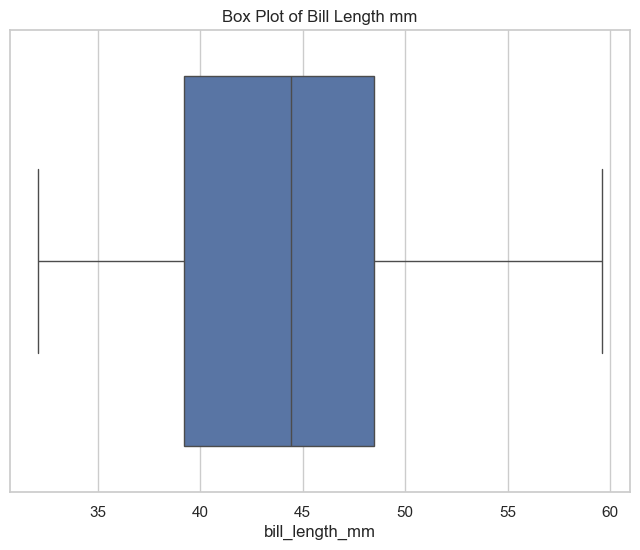

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x=penguins["bill_length_mm"])
plt.title("Box Plot of Bill Length mm")
plt.show()

#### Identify outliers using the IQR method and count the number of outliers for each numercial column ####

""" This section of code uses the for x in y function to iterate through the penguins data set. Next we set the variable q25 and calculate it. Next we set the variable q75 and calculate it. Next we set the variable iqr and calculate it using the variables q25 and q75. Next we create the variables lower_bound and upper_bound and calculate them. Next we create the variable outliers from the dataset penguins by comparing the data found in the set column to the variable lower_bound and upper_bound. We print the name of the column along with the outliers.  When I saw that there were no outliers I added the second print statement to display the lower and upper bounds as a check. """

In [35]:
for column in penguins.select_dtypes(include=np.number).columns:
    q25 = penguins[column].quantile(0.25)
    q75 = penguins[column].quantile(0.75)
    iqr = q75 - q25

    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr

    outliers = penguins[(penguins[column] < lower_bound) | (penguins[column] > upper_bound)]
                  
    print(f"{column}: {outliers.shape[0]} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}\n")
    

bill_length_mm: 0 outliers
Lower bound: 25.312500000000004, Upper bound: 62.412499999999994

bill_depth_mm: 0 outliers
Lower bound: 10.95, Upper bound: 23.349999999999998

flipper_length_mm: 0 outliers
Lower bound: 155.5, Upper bound: 247.5

body_mass_g: 0 outliers
Lower bound: 1750.0, Upper bound: 6550.0

year: 0 outliers
Lower bound: 2004.0, Upper bound: 2012.0



#### Check for Missing values in the dataset ####

"""This next piece of code is pretty straight forward. We call data from the dataset penguins, use the function 'isnull' and the function 'sum' to produce the list of missing values."""

In [36]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Summary - This exercise was challenging but fun. The two lecture videos were extremely helpful in basically giving the code for the outliers and IQR portion. Just required a small amount of adjusting.  I think I'm starting to understand what's happening.  Fun!  I did the initial coding myself, but asked ChatGPT to help with some small errors (like missing braces or brackets).